<a href="https://colab.research.google.com/github/sarathpanat/Pneumonia-detection/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarathpanat","key":"7dc248f227e30f0b566e200957ef7927"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list -s 'Chest X-Ray Images (Pneumonia)'

In [ ]:
!kaggle datasets download -d "paultimothymooney/chest-xray-pneumonia"

100% 2.29G/2.29G [00:30<00:00, 33.2MB/s]
100% 2.29G/2.29G [00:30<00:00, 79.5MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

In [ ]:
import numpy as np
from glob import glob

train_p = np.array(glob("/content/chest_xray/train/PNEUMONIA/*"))
train_n = np.array(glob("/content/chest_xray/train/NORMAL/*"))
valid_p = np.array(glob("/content/chest_xray/val/PNEUMONIA/*"))
valid_n = np.array(glob("/content/chest_xray/val/NORMAL/*"))
test_p = np.array(glob("/content/chest_xray/test/PNEUMONIA/*"))
test_n = np.array(glob("/content/chest_xray/test/NORMAL/*"))

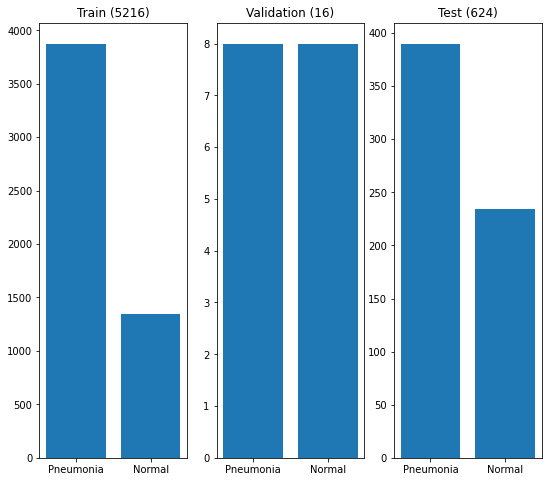

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(9,8))

ax1.bar(['Pneumonia','Normal'],[len(train_p),len(train_n)])
ax1.set_title('Train ('+str(len(train_p)+len(train_n))+')')
ax2.bar(['Pneumonia','Normal'],[len(valid_p),len(valid_n)])
ax2.set_title('Validation ('+str(len(valid_p)+len(valid_n))+')')
ax3.bar(['Pneumonia','Normal'],[len(test_p),len(test_n)])
ax3.set_title('Test ('+str(len(test_p)+len(test_n))+')')
plt.show()


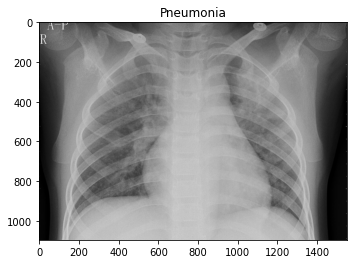

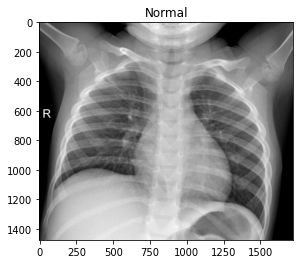

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(train_p[0])
plt.imshow(img)
plt.title('Pneumonia')
plt.show()

img = cv2.imread(train_n[0])
plt.imshow(img)
plt.title('Normal')
plt.show()

In [ ]:
import numpy as np
from glob import glob

pneumonia = np.array(glob("/content/chest_xray/*/PNEUMONIA/*"))
normal = np.array(glob("/content/chest_xray/*/NORMAL/*"))
pneumonia.shape,normal.shape

((4273,), (1583,))

In [ ]:
test_p, valid_p, train_p = np.split(pneumonia, [250,500])
test_n, valid_n, train_n = np.split(normal, [250,500])
valid_p.shape, valid_n.shape, test_p.shape, test_n.shape, train_p.shape, train_n.shape

((250,), (250,), (250,), (250,), (3773,), (1083,))

In [ ]:
np.random.shuffle(train_p)
undersampling, train_p = np.split(train_p, [1607])
train_p.shape, train_n.shape

((2166,), (1083,))

In [ ]:
import cv2
import keras
from keras.utils import to_categorical

valid_data=[]
valid_labels=[]


for img in valid_p:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = np.float32(1)
  valid_data.append(img)
  valid_labels.append(label)

for img in valid_n:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = np.float32(0)
  valid_data.append(img)
  valid_labels.append(label)
  

valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print(valid_data.shape)
print(valid_labels.shape)

(500, 224, 224, 3)
(500,)


In [ ]:
import cv2
import keras
from keras.utils import to_categorical

test_data=[]
test_labels=[]

for img in test_p:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = np.float32(1)
  test_data.append(img)
  test_labels.append(label)

for img in test_n:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = np.float32(0)
  test_data.append(img)
  test_labels.append(label)
  

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print(test_data.shape)
print(test_labels.shape)

(500, 224, 224, 3)
(500,)


In [ ]:
import imgaug.augmenters as iaa
# Augmentation sequence 
seq = iaa.OneOf([
    iaa.GaussianBlur(sigma=(0.0, 3.0)),
    iaa.Affine(rotate=5),
    iaa.Multiply((1.2, 1.5))]) #random brightness

In [ ]:
import cv2
import keras
from keras.utils import to_categorical

train_data=[]
train_labels=[]


for img in train_p:
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  label = np.float32(1)
  train_data.append(img)
  train_labels.append(label)

for i in range(len(train_n)):
  img = train_n[i]
  img = cv2.imread(str(img))
  img = cv2.resize(img, (224,224))
  label = np.float32(0)

  img_aug = seq.augment_image(img)
  img_aug = cv2.cvtColor(img_aug, cv2.COLOR_BGR2RGB)
  img_aug = img_aug.astype(np.float32)/255.0
  train_data.append(img_aug)
  train_labels.append(label)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255.0
  train_data.append(img)
  train_labels.append(label)

train_data = np.array(train_data)
train_labels = np.array(train_labels)

print(train_data.shape)
print(train_labels.shape)

(4332, 224, 224, 3)
(4332,)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_aug = ImageDataGenerator( horizontal_flip = False,
                                      vertical_flip = False, 
                                      height_shift_range = 0.2,
                                      width_shift_range = 0.2, 
                                      rotation_range = 10, 
                                      shear_range = 0.2,
                                      zoom_range=0.2)
train_gen = train_aug.flow(train_data,train_labels,batch_size=16)

In [ ]:
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model

vgg = VGG16(include_top=True, weights='imagenet')
transfer_layer = vgg.get_layer('block5_pool')
vgg = Model(inputs = vgg.input, outputs = transfer_layer.output)

for layer in vgg.layers:
    layer.trainable = False


vgg_model = Sequential()
vgg_model.add(vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation = 'relu'))
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(64, activation = 'relu'))
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(32, activation = 'relu'))
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(1, activation = 'sigmoid'))
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

weight_path="weights-improvement.hdf5"

checkpoint = ModelCheckpoint(weight_path, 
                              monitor= 'val_accuracy', 
                              verbose=1, 
                              save_best_only=True, 
                              mode= 'max', 
                              save_weights_only = True)

early = EarlyStopping(monitor= 'val_accuracy', 
                       mode= 'max', 
                       patience=8)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, verbose = 1,
                                            factor = 0.3, min_lr = 0.000001)

callbacks_list = [early, reduce_lr, checkpoint]

metrics = ['accuracy']

opt = Adam(lr=0.001)

vgg_model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = metrics)

In [ ]:
history = vgg_model.fit_generator(train_gen,
                        steps_per_epoch = train_data.shape[0]//16,
                        validation_data = (valid_data, valid_labels),
                        epochs = 100,
                        callbacks = callbacks_list,shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
270/270 [==============================] - ETA: 0s - loss: 0.3788 - accuracy: 0.8445
Epoch 00001: val_accuracy improved from -inf to 0.90600, saving model to weights-improvement.hdf5
270/270 [==============================] - 50s 187ms/step - loss: 0.3788 - accuracy: 0.8445 - val_loss: 0.2210 - val_accuracy: 0.9060
Epoch 2/100
270/270 [==============================] - ETA: 0s - loss: 0.2506 - accuracy: 0.9032
Epoch 00002: val_accuracy improved from 0.90600 to 0.91600, saving model to weights-improvement.hdf5
270/270 [==============================] - 48s 178ms/step - loss: 0.2506 - accuracy: 0.9032 - val_loss: 0.2046 - val_accuracy: 0.9160
Epoch 3/100
270/270 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.9043
Epoch 00003: val_accuracy improved from 0.91600 to 0.93600, saving model to weights-improvement.hdf5
270/270 [==============================] - 48s 176ms/step - loss:

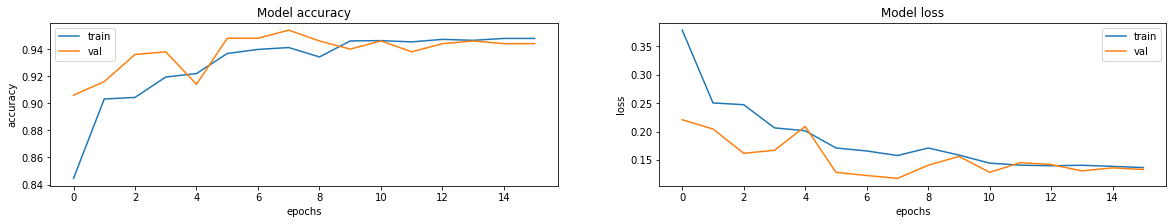

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy','loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
vgg_model.load_weights(weight_path)
pred = vgg_model.predict(test_data, batch_size = 32, verbose = True)

16/16 [==============================] - 2s 111ms/step


In [ ]:
pred=pred.round()
pred=pred.reshape(-1)

[Text(0, 0.5, 'NORMAL'), Text(0, 1.5, 'PNEUMONIA')]

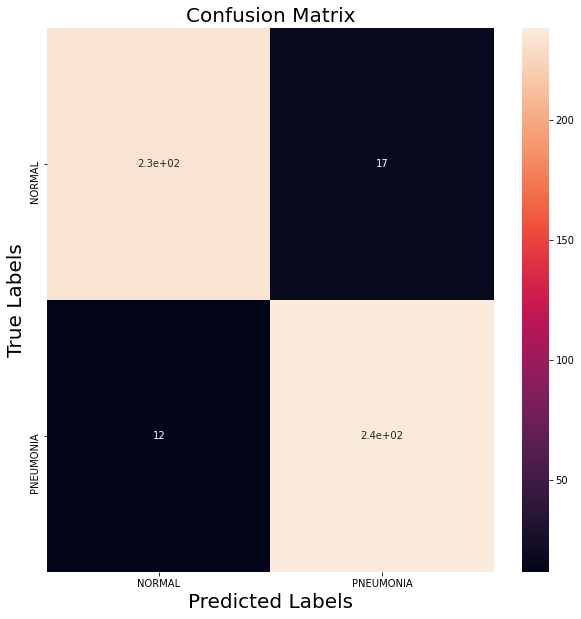

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['NORMAL', 'PNEUMONIA']
tn, fp, fn, tp = confusion_matrix(test_labels, pred).ravel()
matrix = confusion_matrix(test_labels, pred)
plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*((precision*recall)/(precision+recall))

print('accuracy score on test data:',accuracy)
print('precision score on test data:',precision)
print('recall score on test data:',recall)
print('f1_score on test data:',f1_score)

accuracy score on test data: 0.942
precision score on test data: 0.9333333333333333
recall score on test data: 0.952
f1_score on test data: 0.9425742574257425
